# Least Squared Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from sympy import Matrix
from IPython.display import display, Math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()

In [2]:
def error_frac(X_train,y_train,X_eval,y_eval):
    
    w = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
    y_hat = np.sign(X_eval@w)
    error = np.count_nonzero(y_eval-y_hat)/len(y_eval)
    
    return error

def cross_val(X,y,splits):

    error = np.zeros(splits)

    X_splits = np.array_split(X,splits)
    y_splits = np.array_split(y,splits)

    for j in range(splits):
        X_eval_split = X_splits[j]
        y_eval_split = y_splits[j]
        X_train_split = np.concatenate(np.delete(X_splits,j,0))
        y_train_split = np.concatenate(np.delete(y_splits,j,0))
        error[j] = error_frac(X_train_split,y_train_split,X_eval_split,y_eval_split)

    avg_error = np.mean(error)
    
    return avg_error

splits = 10

## Load and Process Data

In [4]:
data = pd.read_csv('nasa_sort.csv')

### Scale and Randomize Features

In [5]:
y = data.Hazardous.values.reshape(-1,1)
X = data.drop(['Hazardous'],axis=1).values
X = scaled.fit_transform(X)

In [6]:
data

,Absolute Magnitude,Est Dia in KM(max),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.284472,6.115834,6.275369e+07,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.300,0.326618,18.113985,5.729815e+07,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,-1
2,20.300,0.517654,7.590711,7.622912e+06,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.400,0.019681,11.173874,4.268362e+07,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,-1
4,21.600,0.284472,9.840831,6.101082e+07,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.098637,22.154265,6.187511e+06,8,0.019777,5.156,2457637.5,0.361512,1.161429,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,-1
4683,28.200,0.013616,3.225150,9.677324e+05,6,0.006451,5.742,2458000.5,0.073200,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,-1
4684,22.700,0.171412,7.191642,9.126775e+06,6,0.059973,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,-1
4685,21.800,0.259442,11.352090,3.900908e+07,5,0.177510,4.477,2458000.5,0.202565,1.486600,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,-1


## All Feature Least Squared

### Without Cross Validation

In [7]:
w = np.linalg.inv(X.T@X)@X.T@y
display(Matrix(np.round(w,3)))

Matrix([
[ -3.068],
[ -4.452],
[ -0.002],
[    0.1],
[ -0.323],
[  -2.41],
[ -5.474],
[   0.55],
[  0.584],
[-74.559],
[ -0.311],
[  0.028],
[  7.662],
[  9.807],
[   0.01],
[ 60.012],
[ -0.748],
[  0.061],
[  4.069]])

In [8]:
yhat = np.sign(X@w)
err = y - yhat
error = np.count_nonzero(err)/len(err)
print('The error using all features without cross validation is',np.round(error*100,2),'%')

The error using all features without cross validation is 9.17 %


### With Cross Validation

In [10]:
avg_error = cross_val(X,y,splits)

print('The expected error of the all feature model is', np.round(avg_error*100,2), '%')

The expected error of the all feature model is 9.39 %


## Feature Selection with Least Sqaured

### Visualization

In [ ]:
fig = plt.figure(figsize=(40,40))

k = 1

ycolors = ['r' if value > 0 else 'b' for value in y]

for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        fig.add_subplot(X.shape[1],X.shape[1], k)
        plt.scatter(X[:,i],X[:,j],color=ycolors, marker='o', alpha=0.05)
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        k = k + 1

### Initial Guess

Two sets of interactions pictured above really stand out for their strong sorting

In [ ]:
plt.figure(figsize=(8,8))
plt.rc('font', size=12)
ycolors = ['r' if value > 0 else 'b' for value in y]
plt.scatter(X[:,0],X[:,5],color=ycolors, marker='o', alpha=0.1)
plt.xlabel('Scaled Absolute Magnitude',fontsize=14)
plt.ylabel('Scaled Minimum Orbit Intersection',fontsize=14)
plt.show()

plt.figure(figsize=(8,8))
plt.rc('font', size=12)
ycolors = ['r' if value > 0 else 'b' for value in y]
plt.scatter(X[:,1],X[:,5],color=ycolors, marker='o', alpha=0.1)
plt.xlabel('Scaled Absolute Magnitude',fontsize=14)
plt.ylabel('Scaled Max Estimated Diameter',fontsize=14)
plt.show()

A model will be built off of these three features

In [ ]:
delete_feat = np.delete(np.arange(X.shape[1]),[0,1])
X_3 = np.delete(X,delete_feat,axis=1)

In [ ]:
avg_error = cross_val(X_3,y,splits) 

print('The expected error of this three feature model is', np.round(avg_error*100,2), '%')

This error is a lot higher than the all feature model, so more a rigorous method will be used

### Ranking Features

In [12]:
least_feat = np.zeros(X.shape[1],dtype=int)

X_del = copy.copy(X)

for k in range(X.shape[1]):

    avg_error = np.zeros(X_del.shape[1])
    
    for i in range(X_del.shape[1]):

        X_del_1 = np.delete(X_del,i,axis=1)

        avg_error[i] = cross_val(X_del_1,y,splits)

    least_feat[k] = np.argmin(avg_error)
    
    X_del = np.delete(X_del,least_feat[k],axis=1)

least_feat = least_feat.tolist()

least_feat_sort = np.zeros(len(least_feat),dtype=int)
least_feat_sort = least_feat_sort.tolist()

least_feat_sort[0] = least_feat[0]  

all_int = list(range(0, 19))

all_int.remove(least_feat_sort[0])
    
for i in range(1,len(least_feat)):
    
    least_feat_sort[i] = all_int[least_feat[i]]
    all_int.pop(least_feat[i])
    
best_feat = np.flip(np.array(least_feat_sort))
print('Ranked Features:', best_feat)

Ranked Features: [15 13  5  0  9  1  4 11  8 10 16  3 12 18  6 14  7  2 17]


In [13]:
avg_error = np.zeros(X.shape[1])

for i in range(len(best_feat)):
    
    delete_feat = np.delete(np.arange(X.shape[1]),best_feat[0:i+1])
    X_del = np.delete(X,delete_feat,axis=1)
        
    avg_error[i] = cross_val(X_del,y,splits)

best_comb = np.argmin(avg_error)

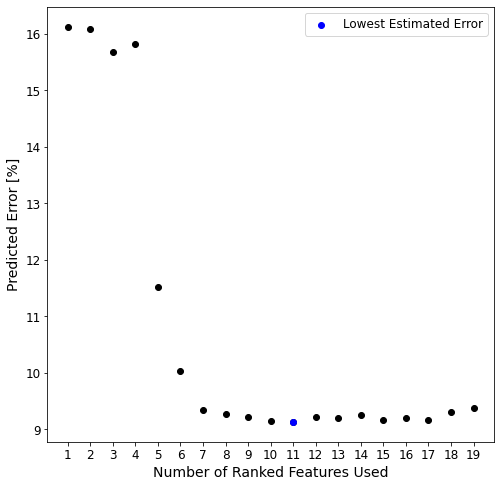

In [14]:
plt.figure(figsize=(8,8))
plt.rc('font', size=12)
plt.scatter(np.arange(0,19)+1,avg_error*100,color='k', marker='o', alpha=1)
plt.scatter(best_comb+1,avg_error[best_comb]*100,color='b', marker='o', alpha=1,label='Lowest Estimated Error')
plt.xlabel('Number of Ranked Features Used',fontsize=14)
plt.xticks(np.arange(0,19)+1)
plt.ylabel('Predicted Error [%]',fontsize=14)
plt.legend(fontsize=12)
plt.show()

Looking at the graph above, the lowest error occurs using the 11 most imporartant features.
However, using just 7 of the most important features provides a comparable error.

## Final Training

In [15]:
data.drop(['Relative Velocity km per sec','Miss Dist.(kilometers)','Jupiter Tisserand Invariant','Epoch Osculation',
           'Eccentricity','Inclination','Asc Node Longitude','Orbital Period','Perihelion Arg','Perihelion Time','Mean Anomaly',
           'Mean Motion'],axis=1,inplace=True)

In [16]:
scaled = MinMaxScaler()
y = data.Hazardous.values.reshape(-1,1)
X_final = data.drop(['Hazardous'],axis=1).values
X_final = scaled.fit_transform(X_final)

In [17]:
data

,Absolute Magnitude,Est Dia in KM(max),Orbit Uncertainity,Minimum Orbit Intersection,Semi Major Axis,Perihelion Distance,Aphelion Dist,Hazardous
0,21.600,0.284472,5,0.025282,1.407011,0.808259,2.005764,1
1,21.300,0.326618,3,0.186935,1.107776,0.718200,1.497352,-1
2,20.300,0.517654,0,0.043058,1.458824,0.950791,1.966857,1
3,27.400,0.019681,6,0.005512,1.255903,0.983902,1.527904,-1
4,21.600,0.284472,1,0.034798,1.225615,0.967687,1.483543,1
...,...,...,...,...,...,...,...,...
4682,23.900,0.098637,8,0.019777,1.161429,0.741558,1.581299,-1
4683,28.200,0.013616,6,0.006451,1.075134,0.996434,1.153835,-1
4684,22.700,0.171412,6,0.059973,1.528234,0.965760,2.090708,-1
4685,21.800,0.259442,5,0.177510,1.486600,1.185467,1.787733,-1


In [18]:
w_final = np.linalg.inv(X_final.T@X_final)@X_final.T@y
display(Matrix(np.round(w_final,3)))

Matrix([
[ -3.161],
[ -4.435],
[ -0.314],
[ -2.328],
[-38.506],
[  5.318],
[ 35.686]])

In [19]:
error = np.count_nonzero(y - np.sign(X_final@w_final))/len(y)
print('The error using the 7 most important features without cross validation is',np.round(error*100,2),'%')

The error using the 7 most important features without cross validation is 9.43 %


In [21]:
expected_error = cross_val(X_final,y,splits)

print('The expected error of this 7 feature model is', np.round(expected_error*100,2), '%')

The expected error of this 7 feature model is 9.34 %


## Validation

### Remove one Feature

In [22]:
avg_error = np.zeros(X_final.shape[1])

for i in range(X_final.shape[1]):
    
    delete_feat = i
    X_del = np.delete(X_final,delete_feat,axis=1)
        
    avg_error[i] = cross_val(X_del,y,splits)

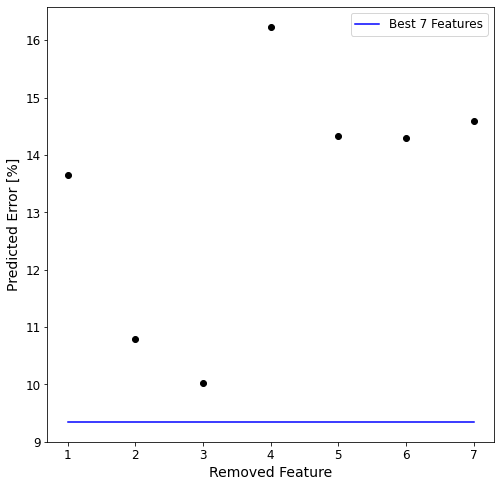

In [23]:
plt.figure(figsize=(8,8))
plt.rc('font', size=12)
plt.scatter(np.arange(X_final.shape[1])+1,avg_error*100,color='k', marker='o', alpha=1)
plt.plot([1,7],[expected_error*100,expected_error*100],color='b',label='Best 7 Features')
plt.xlabel('Removed Feature',fontsize=14)
plt.xticks(np.arange(7)+1)
plt.ylabel('Predicted Error [%]',fontsize=14)
plt.legend()
plt.show()

### Add one Feature

In [24]:
k = 0

avg_error = []
ind = []

for i in range(X.shape[1]):
    
    if i not in best_feat[:7]:
    
        delete_feat = np.delete(np.arange(0,X.shape[1]),np.hstack((best_feat[:7],np.array([i],dtype=int))))
        X_final_add = np.delete(X,delete_feat,axis=1)
        avg_error.append( cross_val(X_final_add,y,splits) )
        ind.append(i)

avg_error = np.array(avg_error)
ind = np.array(ind)

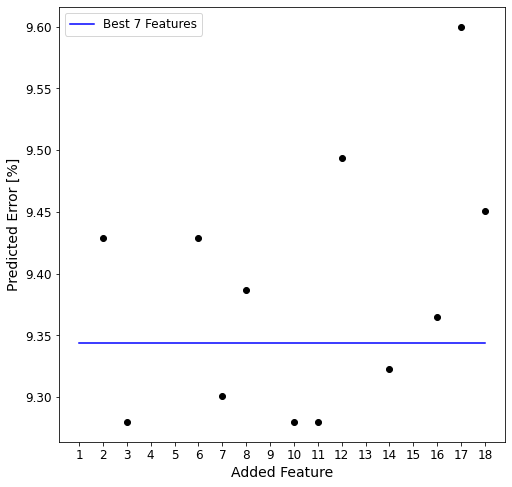

In [25]:
plt.figure(figsize=(8,8))
plt.rc('font', size=12)
plt.scatter(ind,avg_error*100,color='k', marker='o', alpha=1)
plt.plot([1,18],[expected_error*100,expected_error*100],color='b',label='Best 7 Features')
plt.xlabel('Added Feature',fontsize=14)
plt.xticks(np.arange(18)+1)
plt.ylabel('Predicted Error [%]',fontsize=14)
plt.legend()
plt.show()

It can be observed adding any feature to the dataset does not significantly reduce the predicted error. In some cases, adding the feature even increases the expected error. This is consistent with out graph of ranked features and validates the selection of the features.